In [1]:
from matplotlib import pyplot as plt

In [2]:
class Utilities:
    def __init__(self, model, train, test):
        self.model = model  # Model taken from user here
        self.train = train
        self.test = test
    def batch_predict(self, values):
        return self.model.predict(values)  # Your predict logic goes here
    def show_explanation(self, justifier):
        justifier.as_pyplot_figure()
        plt.tight_layout()

In [3]:
from lime.lime_tabular import LimeTabularExplainer
class SampleAlgorithms(Utilities): 
    def __init__(self, model, train, test):
        super(SampleAlgorithms, self).__init__(model, train, test)
        
    def custom_lime_image(self):
        explainer = LimeTabularExplainer(self.train, mode='regression')  # Use lime_image instead
        explanation = explainer.explain_instance(self.test[25],
                                                 self.batch_predict,  # Here we call batch_predict
                                                 num_features=10)  
        self.show_explanation(explanation)

In [4]:
# Trial

In [5]:
from sklearn import datasets, ensemble, model_selection
boston = datasets.load_boston()
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    boston.data, boston.target)
regressor = ensemble.RandomForestRegressor()
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

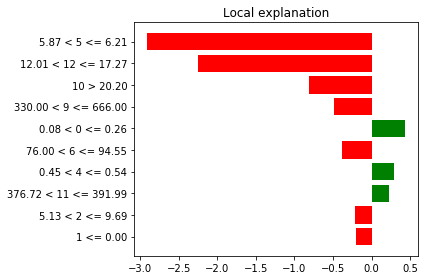

In [6]:
SampleAlgorithms(regressor, X_train, X_test).custom_lime_image()